In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")
#setting the dark of theme for graphics
sns.set_style("dark")
from scipy import stats

Problem Statement: Understand how the bank approves and refuses loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.

The two input files are extracted, cleaned/transformed and few columns are analyzed via different charts generated using different Python libraries. Then some inferences are made based on the outcomes.

## 1) Application Data: Data Exploration

In [2]:
#reading application data from local disc
application_data = pd.read_csv(r'D:\Data_Science\UpGrad\Case Study\application_data.csv')

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#shape of no of records
print("No of Records: ",application_data.shape[0])
print("No of features: ",application_data.shape[1])

No of Records:  307511
No of features:  122


In [5]:
# number of missing values and percentage of the same
missing_values = pd.DataFrame(application_data.isnull().sum().rename("cnt_missing_values"))
missing_values["in_percentage"] = (round(missing_values["cnt_missing_values"]/application_data.shape[0],2))*100

In [6]:
#features which has 14% and more than 14% missing values
missing_values[missing_values["in_percentage"]>=0.14]

,cnt_missing_values,in_percentage
OWN_CAR_AGE,202929,66.0
OCCUPATION_TYPE,96391,31.0
EXT_SOURCE_1,173378,56.0
EXT_SOURCE_3,60965,20.0
APARTMENTS_AVG,156061,51.0
BASEMENTAREA_AVG,179943,59.0
YEARS_BEGINEXPLUATATION_AVG,150007,49.0
YEARS_BUILD_AVG,204488,66.0
COMMONAREA_AVG,214865,70.0
ELEVATORS_AVG,163891,53.0


 
1) There are some meaning in missing values, for example "OWN_CAR_AGE" has 66% of missing values because those appicants don't have a car.

2) Since I'am not doing data preparation for ML model. So, I'm not removing missing values attributes to explore the data. However, I have done some missing value treatment.

In [7]:
#Type of each variable
application_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Checking count of defaulters and non-defaulters
application_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
#I decided below columns are not important of my initial analysis
unwanted_cols = ["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
                     "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9",
                     "FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
                     "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17",
                     "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21",
                    "EXT_SOURCE_1","EXT_SOURCE_3"]

In [10]:
# removing unwanted columns 
i=0
while i< len(unwanted_cols):
    del application_data[unwanted_cols[i]]
    i+=1

In [11]:
len(application_data.columns)

100

In [12]:
#taking subset of application data for shake of analysis
app_sub1 = application_data[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY",
                            "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",
                            "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE",
                            "DAYS_BIRTH","DAYS_EMPLOYED","OWN_CAR_AGE","CNT_FAM_MEMBERS","ORGANIZATION_TYPE"]]

In [13]:
app_sub1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,1.0,Religion


In [14]:
# Getting the counts of number of people owning a car.
app_sub1.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
#Finding a new app_sub1.isnull().sum()

In [16]:
app_sub1["FLAG_OWN_CAR"].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [17]:
app_sub1["OWN_CAR_AGE"]

0          NaN
1          NaN
2         26.0
3          NaN
4          NaN
          ... 
307506     NaN
307507     NaN
307508     NaN
307509     NaN
307510     NaN
Name: OWN_CAR_AGE, Length: 307511, dtype: float64

In [18]:
app_sub1.loc[(app_sub1["OWN_CAR_AGE"].isnull()) & (app_sub1["FLAG_OWN_CAR"]=="N"),'OWN_CAR_AGE']='NotApplicable'

In [19]:
app_sub1.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
OWN_CAR_AGE              5
CNT_FAM_MEMBERS          2
ORGANIZATION_TYPE        0
dtype: int64

In [20]:
app_sub1['AMT_GOODS_PRICE'].fillna(np.mean(app_sub1["AMT_GOODS_PRICE"]), inplace=True)
app_sub1['AMT_ANNUITY'].fillna(np.mean(app_sub1["AMT_ANNUITY"]), inplace=True)
app_sub1['OWN_CAR_AGE'].fillna(np.mean(app_sub1[app_sub1["OWN_CAR_AGE"]!="NotApplicable"].OWN_CAR_AGE), inplace=True)


In [21]:
app_sub1.dropna(inplace=True)

In [22]:
app_sub1.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
OWN_CAR_AGE            0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [23]:
app_sub1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NotApplicable,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NotApplicable,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26,1.0,Government


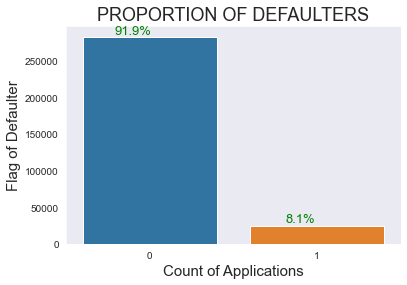

<Figure size 432x288 with 0 Axes>

In [24]:
ax = sns.countplot(app_sub1["TARGET"])

for p in ax.patches:
    ax.annotate('{:.1f}%'.format((p.get_height()/len(app_sub1))*100), (p.get_x()+0.3, p.get_height()+50),
                fontsize=13, color='g',ha='center', va='bottom')

plt.title("PROPORTION OF DEFAULTERS",fontsize=18)
plt.xlabel('Count of Applications',fontsize=15)
plt.ylabel('Flag of Defaulter',fontsize=15)
plt.show()
plt.savefig("output.jpg")
plt.savefig("output1", facecolor='g', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


In the application data, the proportion of defaulters and non-defaluters is significatly different from each other. In other words, the data is imblanaced

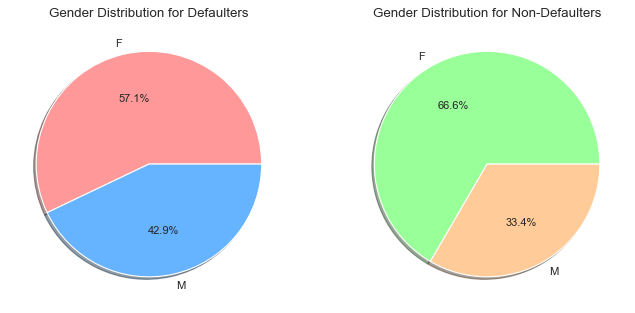

In [25]:


Gender = app_sub1[app_sub1["TARGET"]==0].CODE_GENDER.value_counts().index[:2]
non_defaulters = app_sub1[app_sub1["TARGET"]==0].CODE_GENDER.value_counts().values[:2]
defaulters = app_sub1[app_sub1["TARGET"]==1].CODE_GENDER.value_counts().values[:2]
# Make figure and axes
colors1 = ['#99ff99','#ffcc99']
fig, axs = plt.subplots(1, 2,figsize=(10, 10),dpi=80, facecolor='w', edgecolor='k')

# A standard pie plot
axs[1].pie(non_defaulters, labels=Gender, autopct='%1.1f%%', shadow=True,colors=colors1)
colors2 = ['#ff9999','#66b3ff']
# Shift the second slice using explode
axs[0].pie(defaulters, labels=Gender, autopct='%1.1f%%', shadow=True,
              explode=(0, 0),colors=colors2)
#axs[0].title("Defaulter")

axs[1].title.set_text('Gender Distribution for Non-Defaulters')
axs[0].title.set_text('Gender Distribution for Defaulters')

#
plt.show()

In both case, Female applicants are higher than male applicants.

In [26]:
table = pd.pivot_table(app_sub1, values="NAME_CONTRACT_TYPE",columns="TARGET",index="CODE_GENDER",aggfunc="count")

In [27]:
table

TARGET,0,1
CODE_GENDER,,
F,188277.0,14170.0
M,94403.0,10655.0
XNA,4.0,NaN


In [28]:
#Distribution plots as a function

def vbar_distplot(variable):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax1=sns.countplot(variable, data=app_sub1[app_sub1["TARGET"]==0],alpha=0.5)
    plt.title('Distribution of '+ '%s' %variable +' for Non-Defaulters', fontsize=14)
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_sub1[app_sub1["TARGET"]==0]))*100), (p.get_x()+0.3, p.get_height()+50),
                fontsize=13, color='g',ha='center', va='bottom')


    plt.xlabel(variable)
    plt.xticks(rotation=0)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    ax2=sns.countplot(variable, data=app_sub1[app_sub1["TARGET"]==1],alpha=0.5)
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_sub1[app_sub1["TARGET"]==1]))*100), (p.get_x()+0.3, p.get_height()+50),
                fontsize=13, color='g',ha='center', va='bottom')
    plt.title('Distribution of '+ '%s' %variable +' for Defaulters', fontsize=14)
    plt.xlabel(variable)
    plt.xticks(rotation=0)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

#### Count of how many people having a car

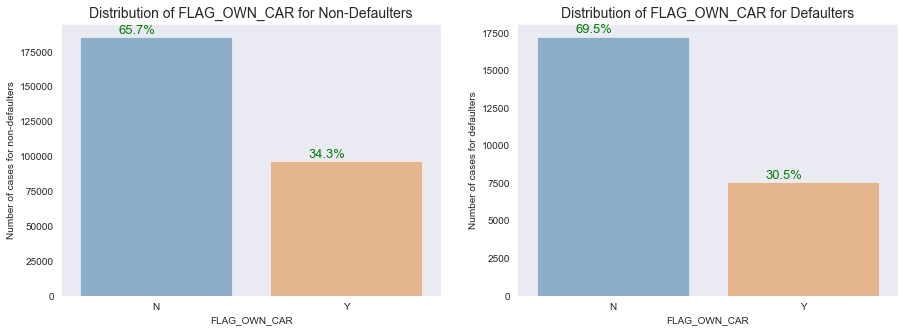

In [29]:
vbar_distplot("FLAG_OWN_CAR")

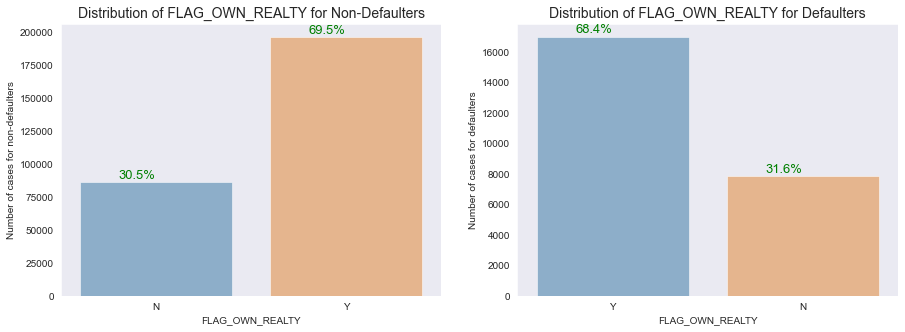

In [30]:
vbar_distplot("FLAG_OWN_REALTY")

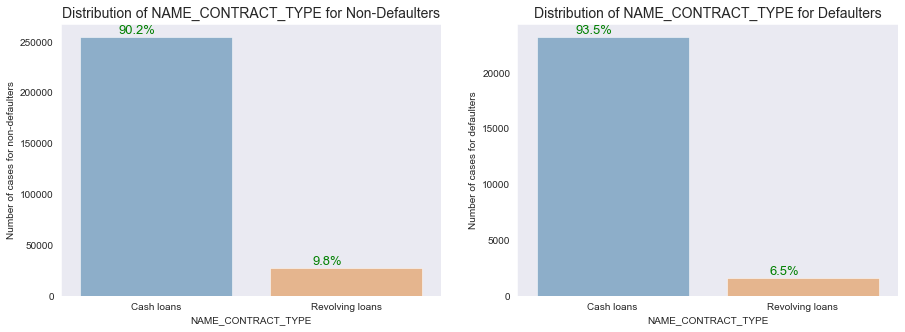

In [31]:
vbar_distplot("NAME_CONTRACT_TYPE")

In [32]:
def hbar_distplot(variable):
    plt.figure(figsize=(10,12))
    plt.subplot(2, 1, 1)
    ax1=sns.countplot(y=variable, data=app_sub1[app_sub1["TARGET"]==0],alpha=0.7)
    plt.title('Distribution of '+ '%s' %variable +' for Non-Defaulters', fontsize=14)
    for p in ax1.patches:
        ax1.text(p.get_width(),p.get_y() + p.get_height()/2, '{:.1f}%'.format(round(float(p.get_width()/len(app_sub1[app_sub1["TARGET"]==0]))*100)), 
            fontsize=12, color='red', ha='left', va='center')

    plt.xlabel(variable)
    plt.xticks(rotation=0)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(2, 1, 2)
    ax2=sns.countplot(y=variable, data=app_sub1[app_sub1["TARGET"]==1],alpha=0.7)
    for p in ax2.patches:
        ax2.text(p.get_width(),p.get_y() + p.get_height()/2, '{:.1f}%'.format(round(float(p.get_width()/len(app_sub1[app_sub1["TARGET"]==1]))*100)), 
            fontsize=12, color='red', ha='left', va='center')
    plt.title('Distribution of '+ '%s' %variable +' for Defaulters', fontsize=14)
    plt.xlabel(variable)
    plt.xticks(rotation=0)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

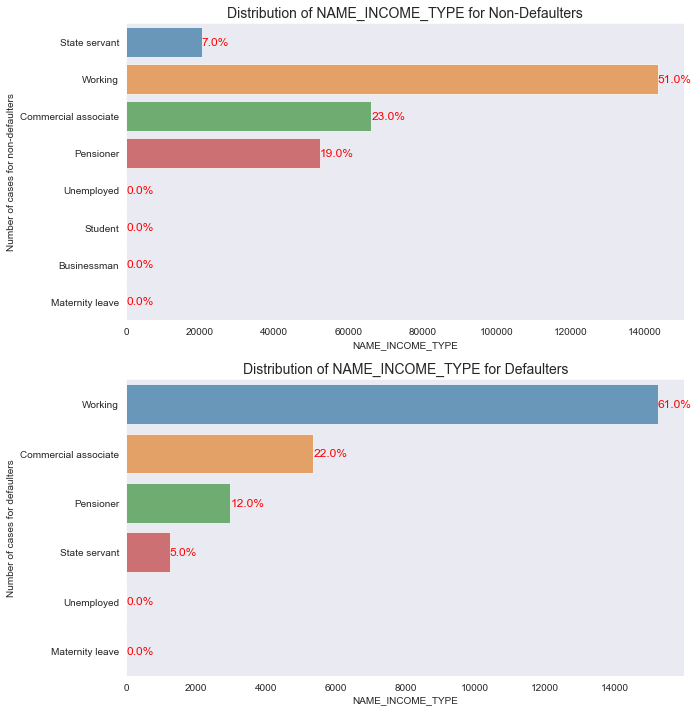

In [33]:
hbar_distplot("NAME_INCOME_TYPE")

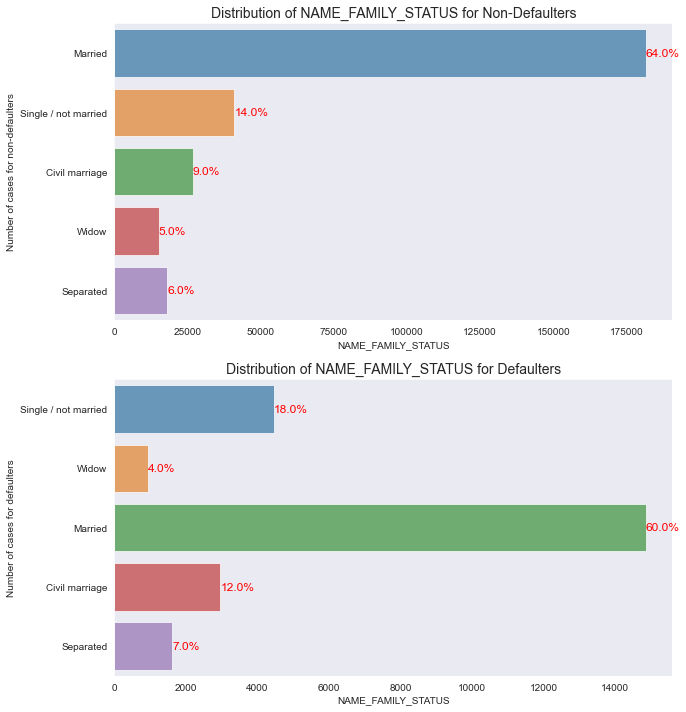

In [34]:
hbar_distplot("NAME_FAMILY_STATUS")

In [35]:
app_sub1['AGE'] =app_sub1['DAYS_BIRTH']//-365.25
app_sub1.drop(['DAYS_BIRTH'],axis=1,inplace=True)
app_sub1['AGE_GROUP']= pd.cut(app_sub1.AGE,bins=np.linspace(20 ,70,num=11))

In [36]:
app_sub1.AGE_GROUP.value_counts()

(35.0, 40.0]    43760
(40.0, 45.0]    40010
(30.0, 35.0]    39450
(25.0, 30.0]    36555
(50.0, 55.0]    35125
(45.0, 50.0]    34337
(55.0, 60.0]    32739
(60.0, 65.0]    24249
(20.0, 25.0]    16408
(65.0, 70.0]     4875
Name: AGE_GROUP, dtype: int64

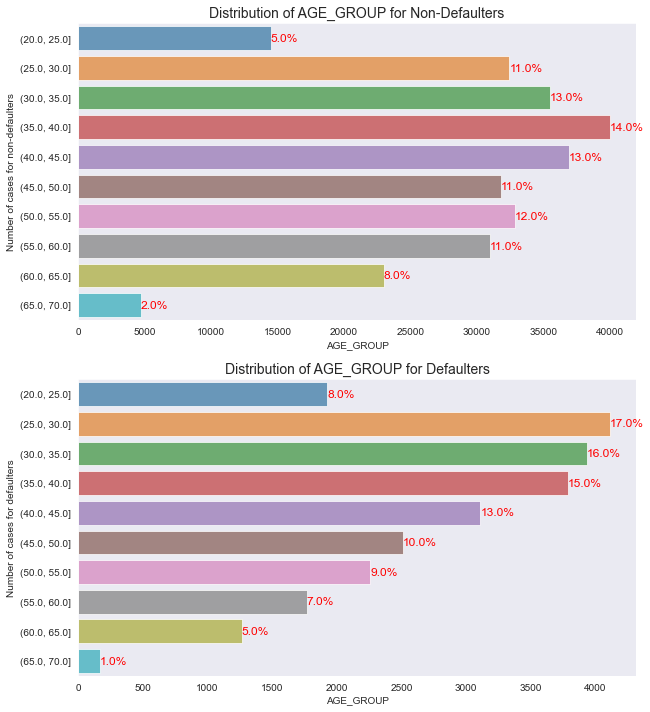

In [37]:
hbar_distplot("AGE_GROUP")


In [38]:
temp = app_sub1[app_sub1["OWN_CAR_AGE"]!="NotApplicable"]
app_car_age=temp[temp.OWN_CAR_AGE<np.percentile(temp['OWN_CAR_AGE'], 99)]


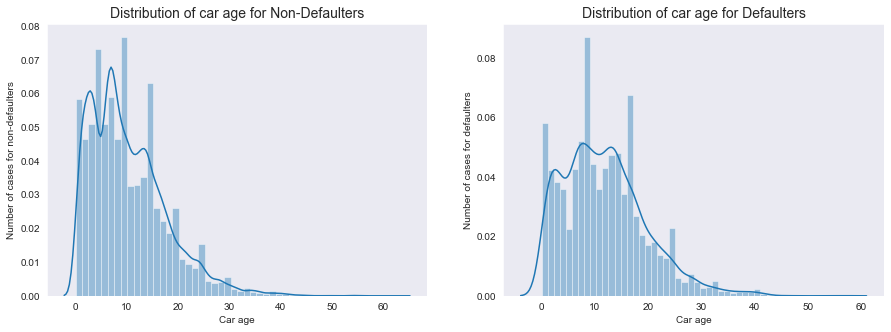

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax1=sns.distplot(app_car_age[app_car_age["TARGET"]==0].OWN_CAR_AGE)
plt.title('Distribution of car age for Non-Defaulters', fontsize=14)


plt.xlabel("Car age")
plt.xticks(rotation=0)
plt.ylabel('Number of cases for non-defaulters')
plt.subplot(1, 2, 2)
ax2=sns.distplot(app_car_age[app_car_age["TARGET"]==1].OWN_CAR_AGE)

plt.title('Distribution of car age for Defaulters', fontsize=14)
plt.xlabel("Car age")
plt.xticks(rotation=0)
plt.ylabel('Number of cases for defaulters')
plt.show()

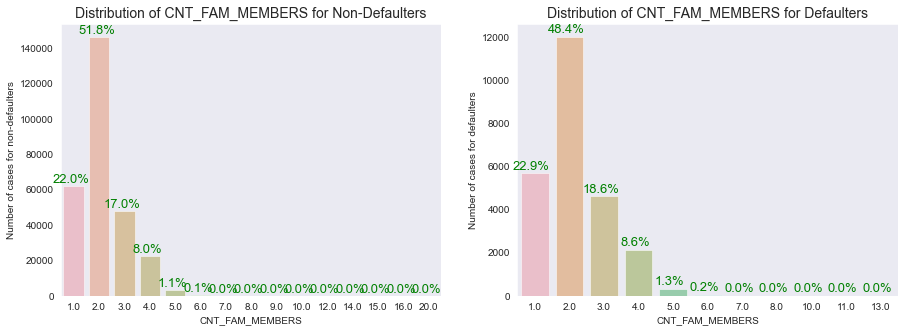

In [40]:
vbar_distplot("CNT_FAM_MEMBERS")

In [41]:
app_sub1['AMT_INCOME_TOTAL'].describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0, 0.5, 'defaulters')

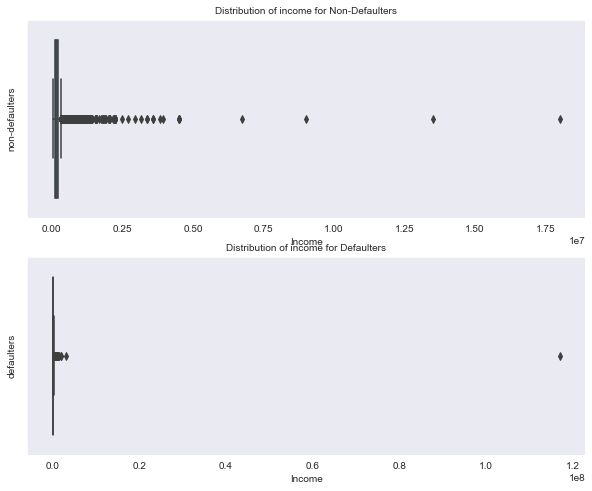

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
ax1=sns.boxplot(app_sub1[app_sub1["TARGET"]==0].AMT_INCOME_TOTAL)
plt.title('Distribution of income for Non-Defaulters', fontsize=10)
plt.xlabel("Income")

plt.ylabel('non-defaulters')
plt.subplot(2, 1, 2)
ax1=sns.boxplot(app_sub1[app_sub1["TARGET"]==1].AMT_INCOME_TOTAL)
plt.title('Distribution of income for Defaulters', fontsize=10)
plt.xlabel("Income")

plt.ylabel('defaulters')


In [43]:
app_sub1=app_sub1[app_sub1.AMT_INCOME_TOTAL<np.nanpercentile(app_sub1['AMT_INCOME_TOTAL'], 99)]

Text(0, 0.5, 'defaulters')

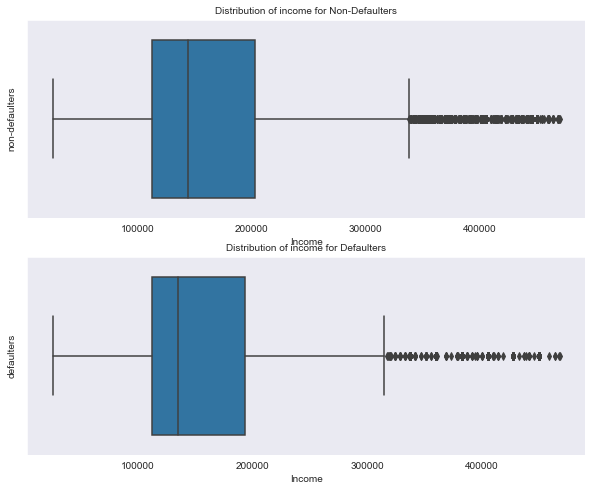

In [44]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
ax1=sns.boxplot(app_sub1[app_sub1["TARGET"]==0].AMT_INCOME_TOTAL)
plt.title('Distribution of income for Non-Defaulters', fontsize=10)
plt.xlabel("Income")

plt.ylabel('non-defaulters')
plt.subplot(2, 1, 2)
ax1=sns.boxplot(app_sub1[app_sub1["TARGET"]==1].AMT_INCOME_TOTAL)
plt.title('Distribution of income for Defaulters', fontsize=10)
plt.xlabel("Income")

plt.ylabel('defaulters')

In [45]:
#Creating binned var
app_sub1.loc[:,'INCOME_RANGE']=pd.qcut(app_sub1.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

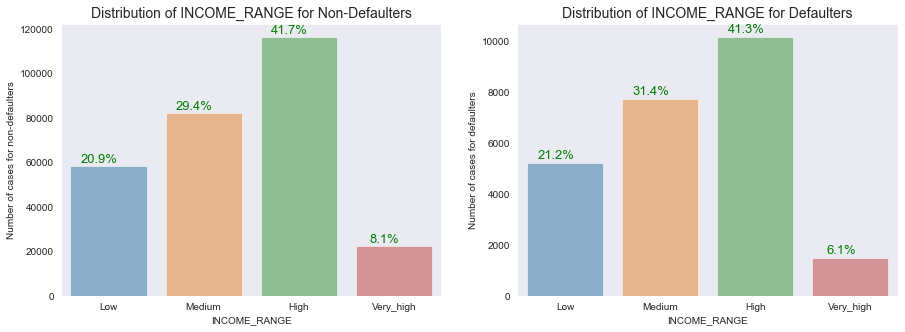

In [46]:
vbar_distplot("INCOME_RANGE")

In [47]:
app_sub1['YEARS_EMPLOYED'] =app_sub1['DAYS_EMPLOYED']//-365.25


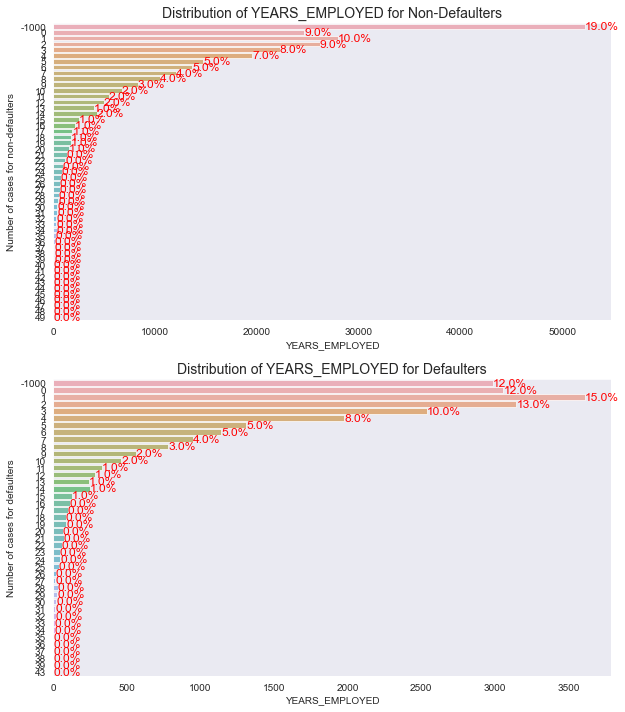

In [48]:
hbar_distplot("YEARS_EMPLOYED")

In [49]:
app_sub1[app_sub1['DAYS_EMPLOYED']//-365.25<0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE,AGE_GROUP,INCOME_RANGE,YEARS_EMPLOYED
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,Married,House / apartment,365243,NotApplicable,2.0,XNA,55,"(50.0, 55.0]",Medium,-1000
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,Married,House / apartment,365243,NotApplicable,2.0,XNA,55,"(50.0, 55.0]",Low,-1000
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,Married,House / apartment,365243,NotApplicable,2.0,XNA,67,"(65.0, 70.0]",Low,-1000
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,Married,House / apartment,365243,NotApplicable,2.0,XNA,65,"(60.0, 65.0]",Low,-1000
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,Single / not married,House / apartment,365243,NotApplicable,1.0,XNA,64,"(60.0, 65.0]",Medium,-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,Single / not married,House / apartment,365243,NotApplicable,1.0,XNA,61,"(60.0, 65.0]",High,-1000
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,Separated,House / apartment,365243,NotApplicable,1.0,XNA,68,"(65.0, 70.0]",Low,-1000
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,Married,House / apartment,365243,NotApplicable,2.0,XNA,63,"(60.0, 65.0]",Medium,-1000
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,Single / not married,House / apartment,365243,NotApplicable,1.0,XNA,66,"(65.0, 70.0]",Medium,-1000


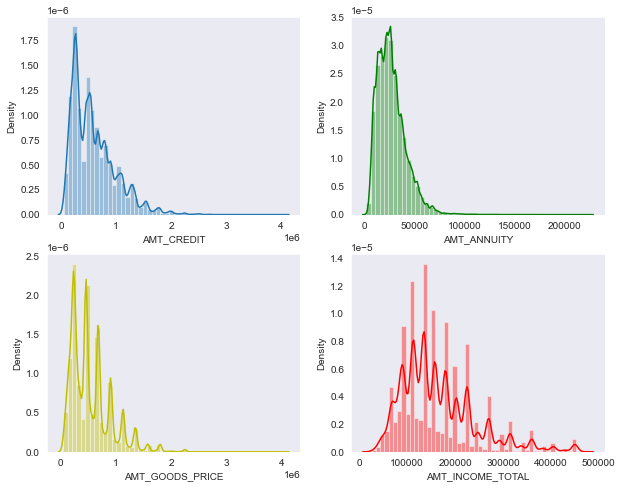

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.distplot(app_sub1["AMT_CREDIT"])
plt.subplot(2, 2, 2)
ax2=sns.distplot(app_sub1["AMT_ANNUITY"],color="g")
plt.subplot(2, 2, 3)
ax2=sns.distplot(app_sub1["AMT_GOODS_PRICE"],color="y")
plt.subplot(2, 2, 4)
ax2=sns.distplot(app_sub1["AMT_INCOME_TOTAL"],color="r")



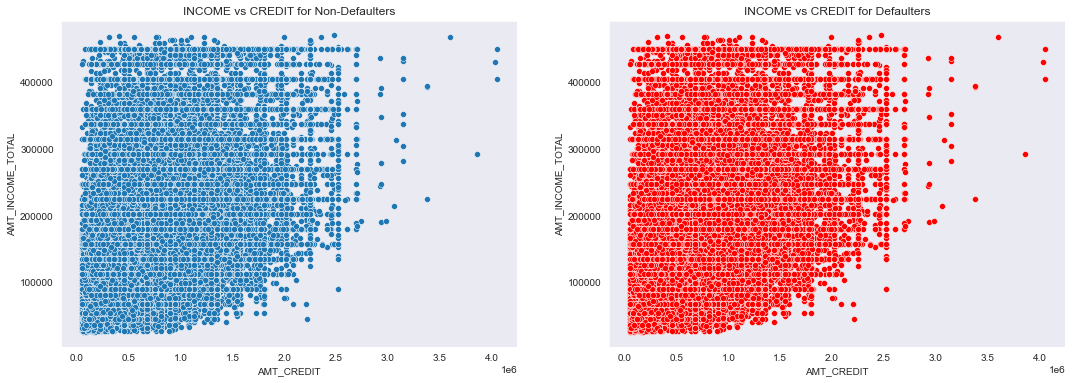

In [51]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_sub1[app_sub1["TARGET"]==0])
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_sub1[app_sub1["TARGET"]==0],color="r")
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

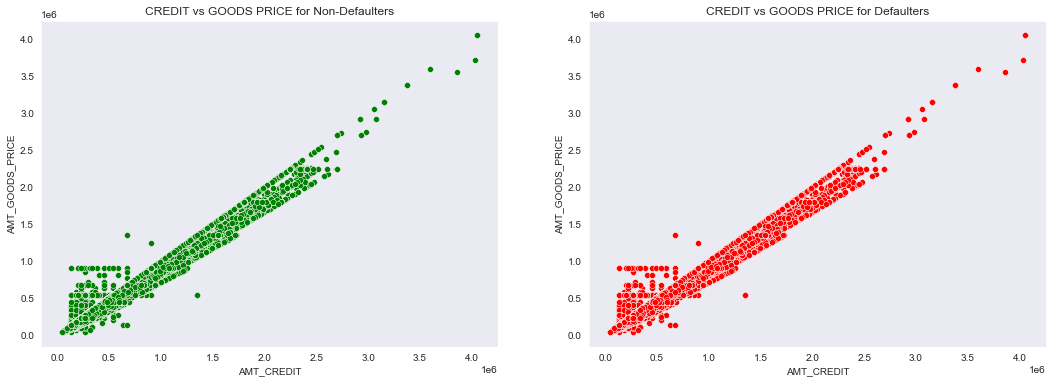

In [52]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_sub1[app_sub1["TARGET"]==0],color="g")
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_sub1[app_sub1["TARGET"]==0],color="r")
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

In [53]:
numerical_ft=list(app_sub1.select_dtypes('float').columns)
d=app_sub1[numerical_ft]
d_corr = d.corr()
round(d_corr, 3)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
AMT_INCOME_TOTAL,1.000,0.397,0.471,0.401,0.036
AMT_CREDIT,0.397,1.000,0.772,0.986,0.063
AMT_ANNUITY,0.471,0.772,1.000,0.775,0.076
AMT_GOODS_PRICE,0.401,0.986,0.775,1.000,0.061
CNT_FAM_MEMBERS,0.036,0.063,0.076,0.061,1.000


<AxesSubplot:>

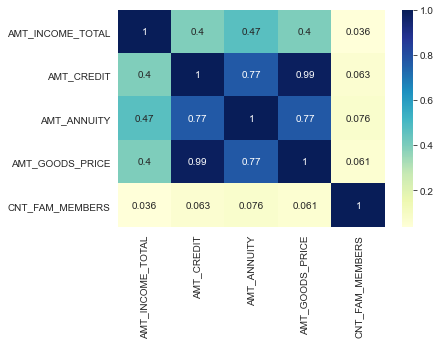

In [54]:
sns.heatmap(d.corr(), cmap="YlGnBu", annot=True)

In [55]:
previous_app = pd.read_csv(r'D:\Data_Science\UpGrad\Case Study\previous_application.csv')


In [56]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
print("No of Records: ",previous_app.shape[0])
print("No of features: ",previous_app.shape[1])

No of Records:  1670214
No of features:  37


In [58]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [65]:
previous_app.dtypes.value_counts()

object     15
int64       6
float64     5
dtype: int64

In [66]:
missing_values_pre = pd.DataFrame(previous_app.isnull().sum().rename("cnt_missing_values"))
missing_values_pre["in_percentage"] = (round(missing_values_pre["cnt_missing_values"]/previous_app.shape[0],2))*100

In [67]:
missing_values_pre[missing_values_pre["in_percentage"]>=25.0]

,cnt_missing_values,in_percentage


In [62]:
for x in missing_values_pre[missing_values_pre["in_percentage"]>=25.0].index:
    del previous_app[x]

In [63]:
previous_app.shape

(1670214, 26)

In [64]:
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=previous_app)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

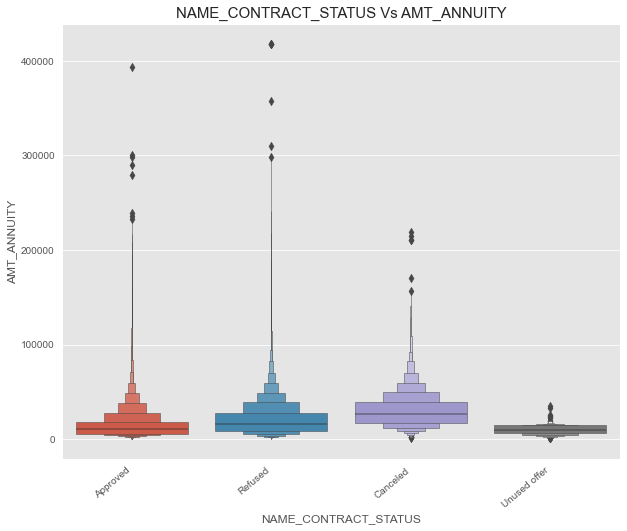

In [68]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

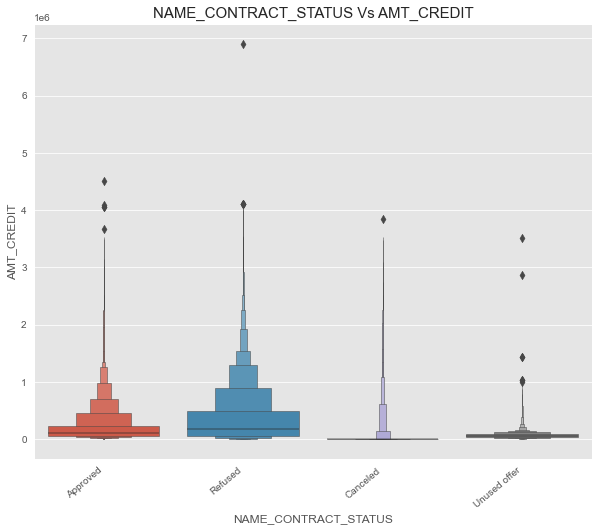

In [69]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

In [70]:
combined = pd.merge(app_sub1, previous_app, how='inner', on=['SK_ID_CURR'])

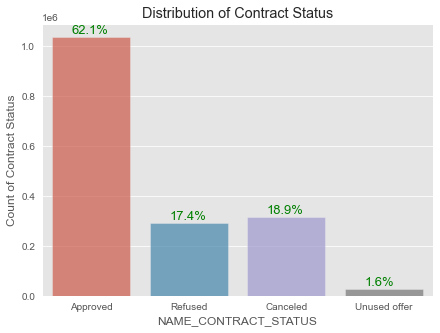

In [71]:
plt.figure(figsize=(7,5))
ax =sns.countplot(previous_app.NAME_CONTRACT_STATUS,alpha=0.7)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format((p.get_height()/len(previous_app))*100), (p.get_x()+0.2, p.get_height()+50),
                fontsize=13, color='g',ha='left', va='bottom')
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [72]:
combined.shape

(1401271, 48)

In [73]:
approved=combined[combined.NAME_CONTRACT_STATUS=='Approved']
refused=combined[combined.NAME_CONTRACT_STATUS=='Refused']
canceled=combined[combined.NAME_CONTRACT_STATUS=='Canceled']
unused=combined[combined.NAME_CONTRACT_STATUS=='Unused Offer']

In [74]:
def plots_app(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,alpha=0.7)
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height(),"{:.1f}%".format(round((p.get_height()/len(refused))*100)), 
            fontsize=12, color='g', ha='center', va='bottom')
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,alpha=0.7)
    for p in ax2.patches:
        ax2.text(p.get_x() + p.get_width()/2., p.get_height(),"{:.1f}%".format(round((p.get_height()/len(approved))*100)), 
            fontsize=12, color='g', ha='center', va='bottom')
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,alpha=0.7)
    for p in ax3.patches:
        ax3.text(p.get_x() + p.get_width()/2., p.get_height(),"{:.1f}%".format(round((p.get_height()/len(canceled))*100)), 
            fontsize=12, color='g', ha='center', va='bottom')
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

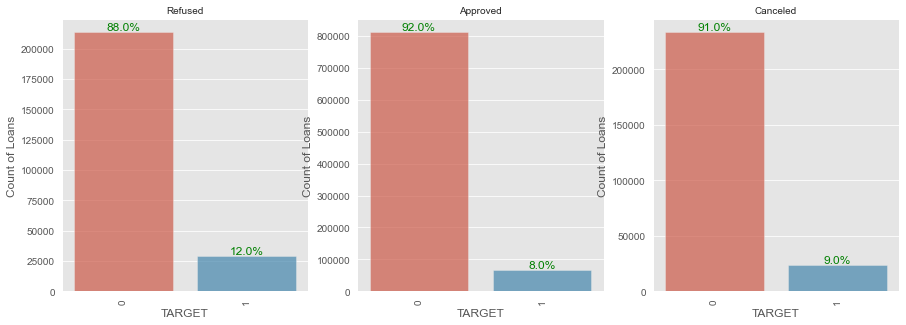

In [75]:
plots_app('TARGET')

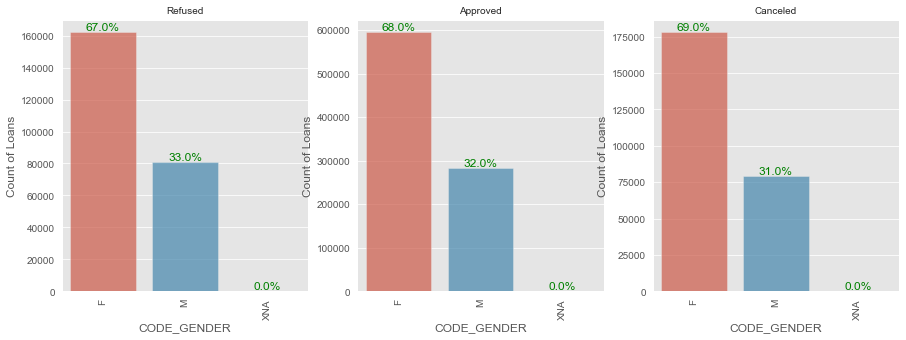

In [76]:
plots_app('CODE_GENDER')

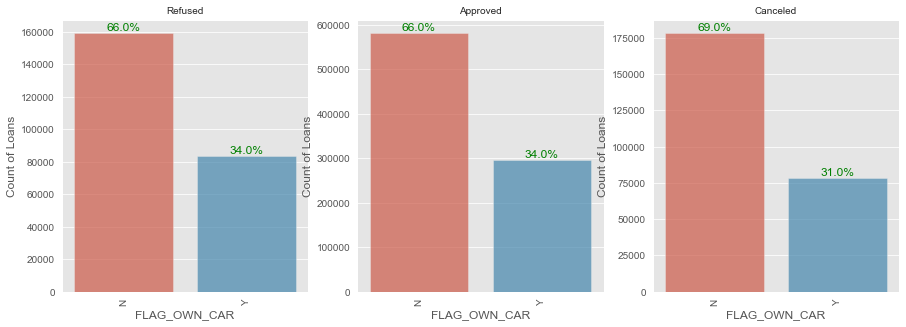

In [77]:
plots_app('FLAG_OWN_CAR')

In [78]:
refused.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'AGE', 'AGE_GROUP', 'INCOME_RANGE',
       'YEARS_EMPLOYED', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NA

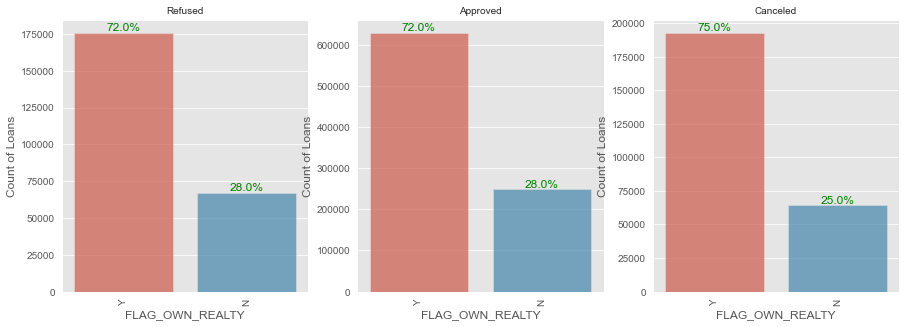

In [79]:
plots_app('FLAG_OWN_REALTY')

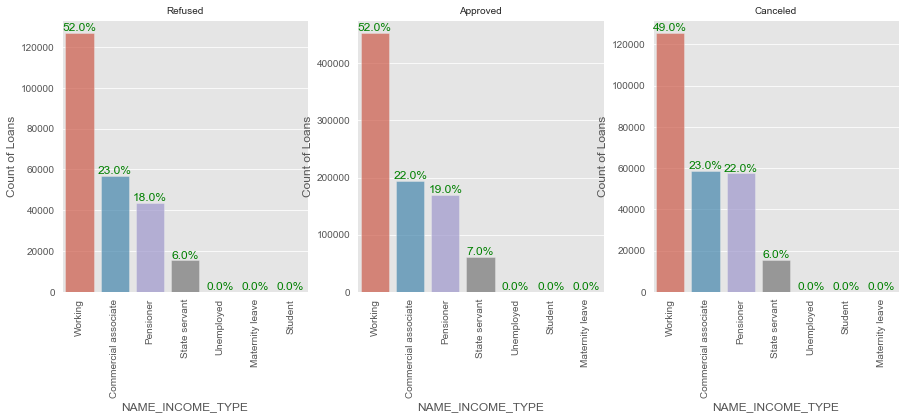

In [80]:
plots_app('NAME_INCOME_TYPE')

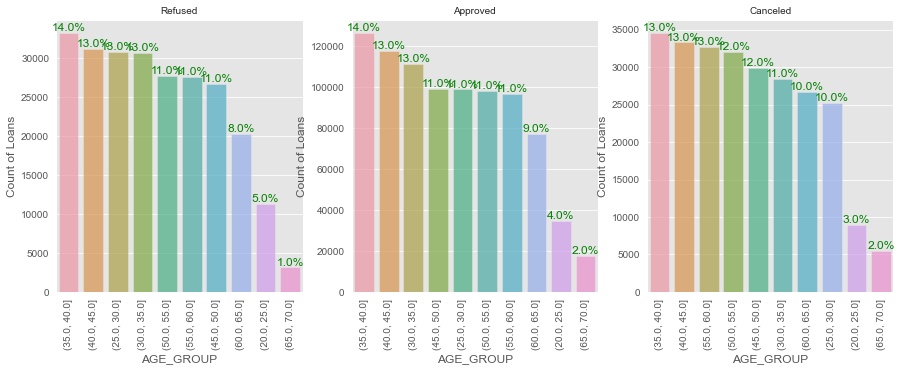

In [81]:
plots_app('AGE_GROUP')

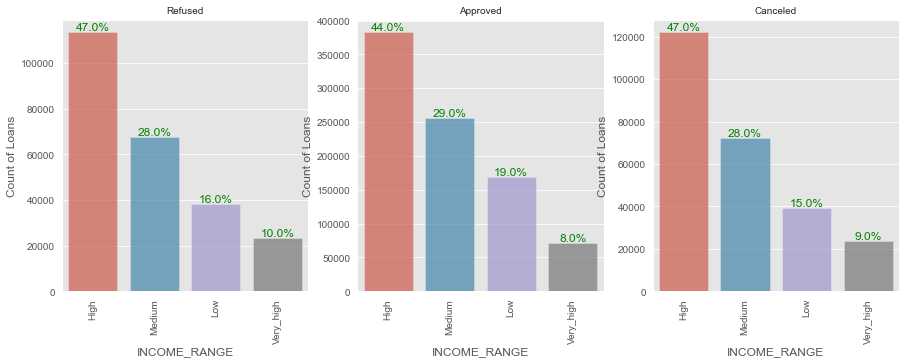

In [82]:
plots_app('INCOME_RANGE')

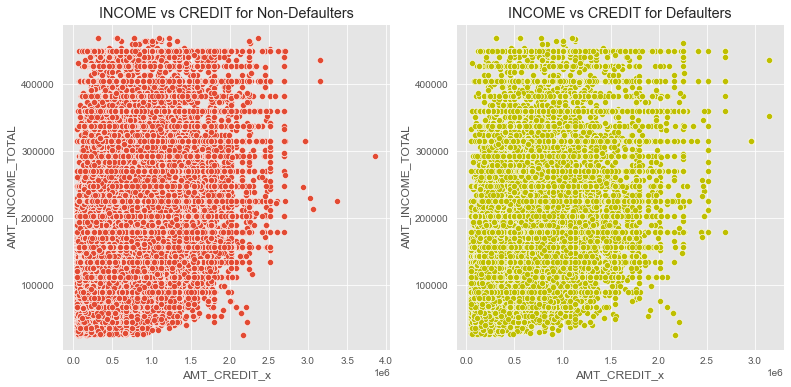

In [83]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.scatterplot(x='AMT_CREDIT_x',y='AMT_INCOME_TOTAL',data=approved)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(132)
sns.scatterplot(x='AMT_CREDIT_x',y='AMT_INCOME_TOTAL',data=refused,color="y")
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()